# Homework 4 - Decision Trees / Random Forests

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart disease. It's the same data set as from HW3, so that way you'll be familiar with it.

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death: if the patient died during the follow-up period (boolean) 

For each ```boolean``` variable, a value of 1 = True and 0 = False. For sex, female = 0 and male = 1.


### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict patient survival
- Find if there are any important features related to patient survival

In this assignment, we will be using Clustering to identify clusters of patients, then seeing how well the various clustering methods work against the true clusters (classes). A good resource to use would be [Sci-Kit Learn's Clustering info](https://scikit-learn.org/stable/modules/clustering.html)

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW4.ipynb

If you submit a zip file or anything else, you will receive -5 points.

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using. Add any you want to use.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own.


In [2]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data to remember what it looks like:

In [3]:
heart_df = pd.read_csv('data_hw4.csv')
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Part 1: Visual Analysis

In this HW, since you've had plenty of experience with visual analysis in general and on this data set, we are going to skip this part.

### Part 2: Clustering

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be entirely on your own, with less detailed instructions. If you have any questions, check out your previous labs, the lecture notes, or the just google the specific function to see how to use it.

Your checklist of items to do will be as such:

1. Scale the data (5 pts)
2. Split it into training/testing sets (5 pts)
3. Cluster the patients using the 3 methods imported from sklearn.clustering (see above) (40 pts)
- As a note, you'll want to try and optimize the parameters within these models to have good accuracy as well as good generalization (no overfitting). 
- Also, if you can, try and rank your features to get a kind of feature importance (Think about how you might do this. There are multiple ways to do it.)
4. Write a report, which should have ample information on your methods, implementation, results, and various graphs/charts explaining how your model performed. How could you visualize the clusters or how well they performed? What issues might they have? What are some pros and cons of different methods? How well do your clustering results match the true clusters (classes)? The report has the following criteria (50 pts): 
- Should be at LEAST 2-3 paragraphs, and a paragraph is more than just 2-3 sentences.
- Explain your methods, including optimization techniques and WHY you used them
- Contain at LEAST 3 charts/graphs showcasing how well your methods predicted heart disease
- Remember, this is a data science project, so you should be thinking and exploring your data and models. What does the data tell us?

On this HW, it is very difficult to copy your friends, as it will be obvious. Cheating will result in an automatic zero, so make sure your work is original. The point of these HW assignments is for you to think, so if you simply tell me what you did or type definitions of methods to make your report seem long, you will lose points. Each HW assignment is graded in detail.

### Scale and split the data

In [4]:
heart_df['death'].value_counts()

0    203
1     96
Name: death, dtype: int64

In [5]:
X=heart_df.drop('death', axis=1)
y=heart_df['death']

mm_scaler = MinMaxScaler()

X_mm = pd.DataFrame(mm_scaler.fit_transform(X), columns=X.columns)

train_x, test_x, train_y, test_y = train_test_split(X_mm, y, test_size=0.2, random_state=42, stratify=y)

train_x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
115,0.327273,1.0,0.048099,0.0,0.393939,0.0,0.168384,0.056180,0.742857,0.0,0.0,0.309609
23,0.236364,0.0,0.005103,1.0,0.696970,0.0,0.415687,0.033708,0.628571,1.0,0.0,0.064057
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
247,0.436364,0.0,0.015310,0.0,0.166667,0.0,0.267790,0.213483,0.628571,1.0,0.0,0.747331
194,0.090909,0.0,0.071319,0.0,0.090909,1.0,0.122318,0.123596,0.628571,1.0,0.0,0.626335


- __Rank your features to get a kind of feature importance using Logistic regression coefficients__

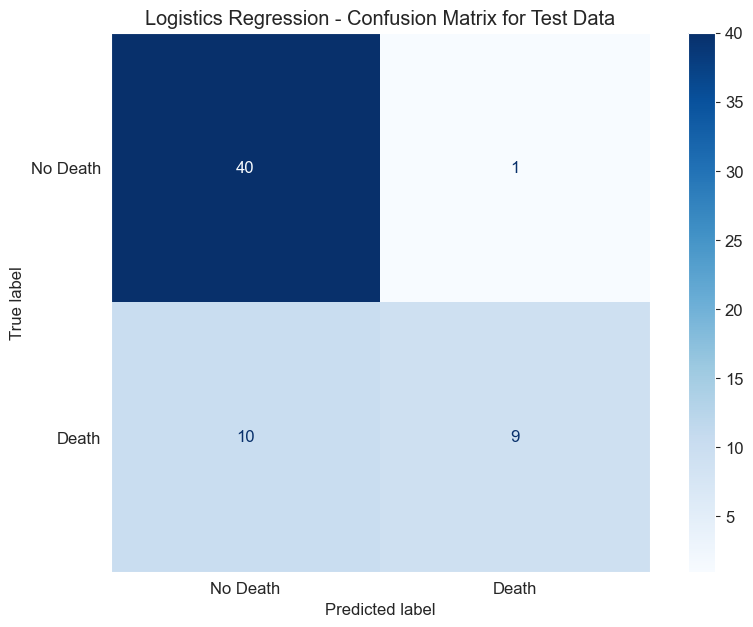

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x, train_y)
logreg_pred = logreg.predict(test_x)
logreg_cm = confusion_matrix(test_y, logreg_pred)
logreg_cm_disp = ConfusionMatrixDisplay(confusion_matrix=logreg_cm, display_labels=['No Death', 'Death'])
logreg_cm_disp.plot(cmap='Blues')
plt.title('Logistics Regression - Confusion Matrix for Test Data')
plt.grid(b=None)
plt.show()

In [7]:
features = train_x.columns.tolist()

# Get the coefficients of the logistic regression model
coefs = logreg.coef_[0]

# Create a data frame of the coefficients and their corresponding features
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefs})

print(coef_df)

                     Feature  Coefficient
0                        age     1.079374
1                    anaemia     0.160698
2   creatinine_phosphokinase     0.771792
3                   diabetes     0.291897
4          ejection_fraction    -2.217562
5        high_blood_pressure     0.122892
6                  platelets    -0.361179
7           serum_creatinine     1.936039
8               serum_sodium    -0.666581
9                        sex    -0.154494
10                   smoking     0.119569
11                      time    -3.568838


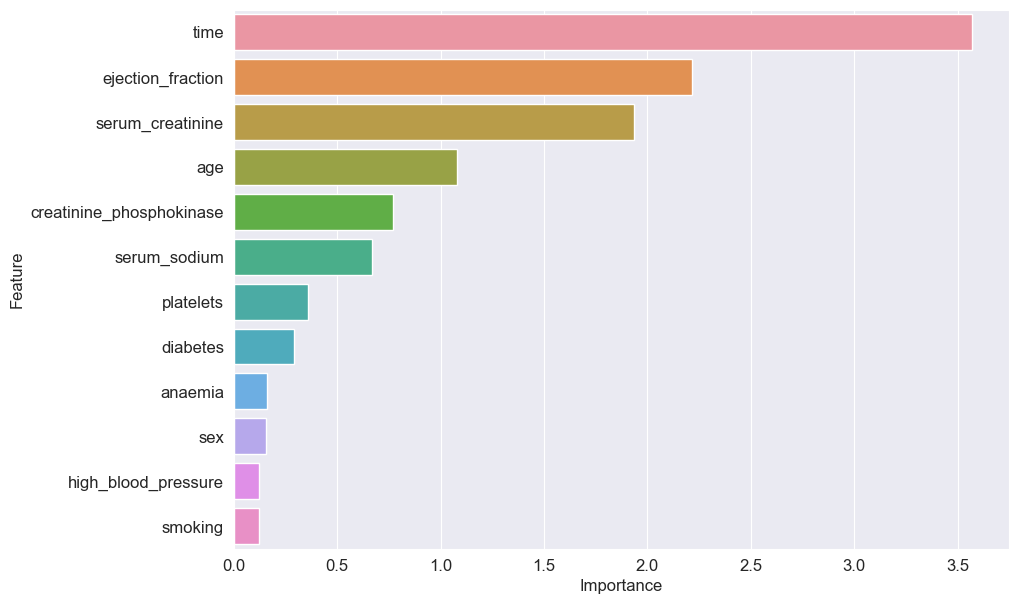

In [8]:
feature_importance = pd.DataFrame({'Feature': train_x.columns, 'Importance': np.abs(logreg.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.show()

- As we can see, there are a few features that are important to the model:
    - time (coefficient = -3.568838)
    - ejection_fraction (coefficient = -2.217562)
    - serum_creatinine (coefficient = 1.936039)
    - age (coefficient = 1.079374)

## Clusters

### ___KMeans___

In [9]:
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(train_x)

kmeans_train_clusters = kmeans.predict(train_x)
kmeans_test_clusters = kmeans.predict(test_x)

kmeans_train_silhouette = silhouette_score(train_x, kmeans_train_clusters)
kmeans_test_silhouette = silhouette_score(test_x, kmeans_test_clusters)

print(f"KMeans Silhouette Score - Training data: {kmeans_train_silhouette}")
print(f"KMeans Silhouette Score - Testing data: {kmeans_test_silhouette}")

KMeans Silhouette Score - Training data: 0.2052688488782305
KMeans Silhouette Score - Testing data: 0.21067250461332046


- As we can see, the Silhouette scores are pretty low. We should try to get a better number of clusters.

- Use Elbow method to get the optimal number of clusters.

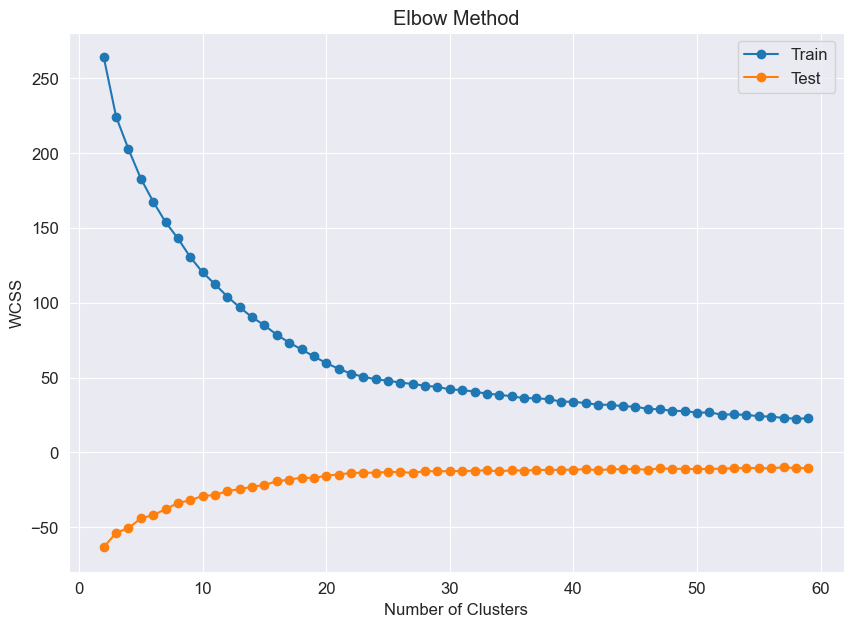

In [10]:
# within-cluster sum of squares
train_wcss = []
test_wcss = []

for i in range(2, 60):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=60, random_state=42)
    
    # Fit KMeans model on train_x and predict clusters for train_x and test_x
    kmeans.fit(train_x)
    train_wcss.append(kmeans.inertia_)
    test_wcss.append(kmeans.score(test_x))
    
# Plot WCSS as a function of k for train_x and test_x
plt.plot(range(2, 60), train_wcss, '-o', label='Train')
plt.plot(range(2, 60), test_wcss, '-o', label='Test')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

- The number we are looking for is around 23

- Try to find the optimal number of clusters using silhouette scores

Optimal number of clusters (train):  22
Optimal number of clusters (test):  19


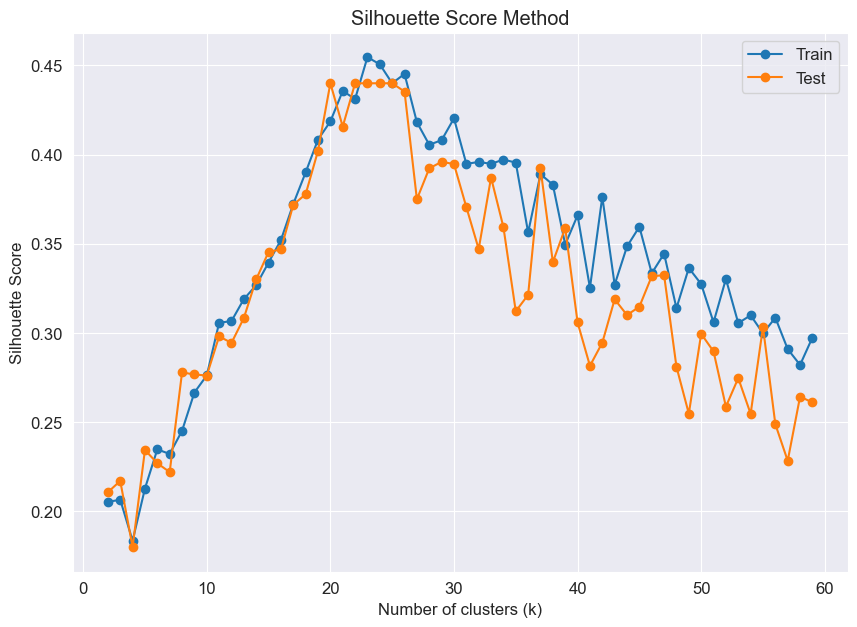

In [11]:
kmeans_train_silhouette_scores = []
kmeans_test_silhouette_scores = []

for i in range(2, 60):
    kmeans = KMeans(n_clusters=i)
    
    # Fit KMeans model on train_x and predict clusters for train_x and test_x
    kmeans.fit(train_x)
    train_preds = kmeans.predict(train_x)
    test_preds = kmeans.predict(test_x)
    
    # Compute silhouette scores for train_x and test_x
    train_score = silhouette_score(train_x, train_preds)
    test_score = silhouette_score(test_x, test_preds)
    
    # Append silhouette scores to respective lists
    kmeans_train_silhouette_scores.append(train_score)
    kmeans_test_silhouette_scores.append(test_score)

# Find optimal number of clusters based on maximum silhouette score
optimal_n_clusters_train = kmeans_train_silhouette_scores.index(max(kmeans_train_silhouette_scores)) + 1
print("Optimal number of clusters (train): ", optimal_n_clusters_train)
optimal_n_clusters_test = kmeans_test_silhouette_scores.index(max(kmeans_test_silhouette_scores)) + 1
print("Optimal number of clusters (test): ", optimal_n_clusters_test)

# Plot silhouette scores as a function of k for train_x and test_x
plt.plot(range(2, 60), kmeans_train_silhouette_scores, '-o', label='Train')
plt.plot(range(2, 60), kmeans_test_silhouette_scores, '-o', label='Test')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.legend()
plt.show()

- Try again with number of clusters = 23

In [12]:
kmeans = KMeans(n_clusters=23, random_state=42)

kmeans.fit(train_x)

kmeans_train_clusters = kmeans.predict(train_x)
kmeans_test_clusters = kmeans.predict(test_x)

kmeans_train_silhouette = silhouette_score(train_x, kmeans_train_clusters)
kmeans_test_silhouette = silhouette_score(test_x, kmeans_test_clusters)

print(f"KMeans Silhouette Score - Training data: {kmeans_train_silhouette}")
print(f"KMeans Silhouette Score - Testing data: {kmeans_test_silhouette}")

KMeans Silhouette Score - Training data: 0.45133038876274656
KMeans Silhouette Score - Testing data: 0.4399676902867792


- Visualization

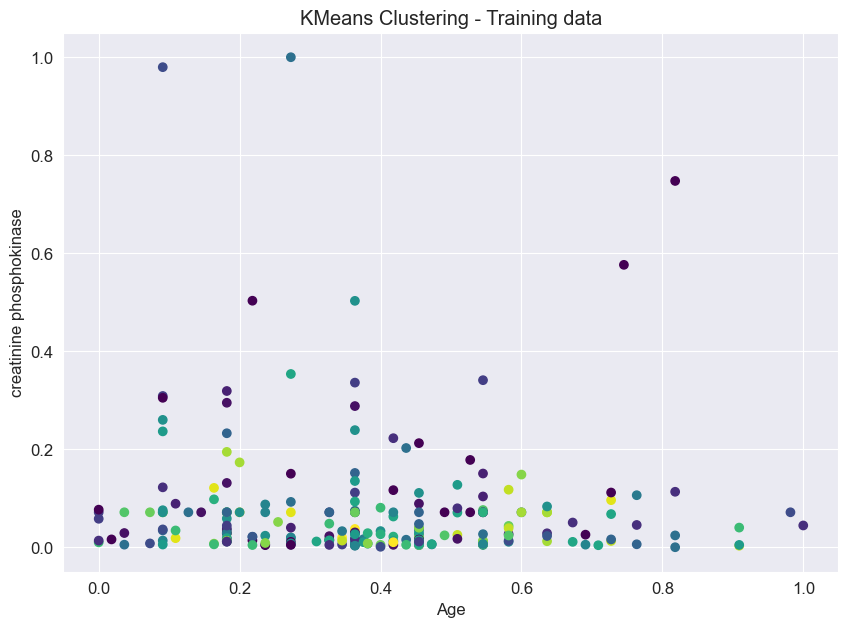

In [94]:
# training data
plt.scatter(train_x.iloc[:, 0], train_x.iloc[:, 2], c=kmeans_train_clusters, cmap='viridis')
plt.title('KMeans Clustering - Training data')
plt.xlabel('Age')
plt.ylabel('creatinine phosphokinase')
plt.show()

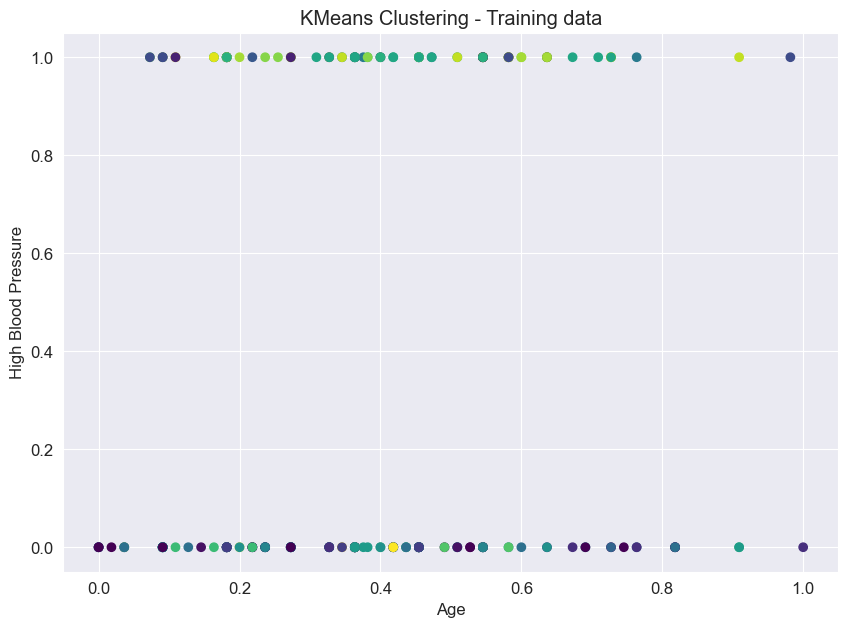

In [93]:
# training data
plt.scatter(train_x.iloc[:, 0], train_x.iloc[:, 5], c=kmeans_train_clusters, cmap='viridis')
plt.title('KMeans Clustering - Training data')
plt.xlabel('Age')
plt.ylabel('High Blood Pressure')
plt.show()

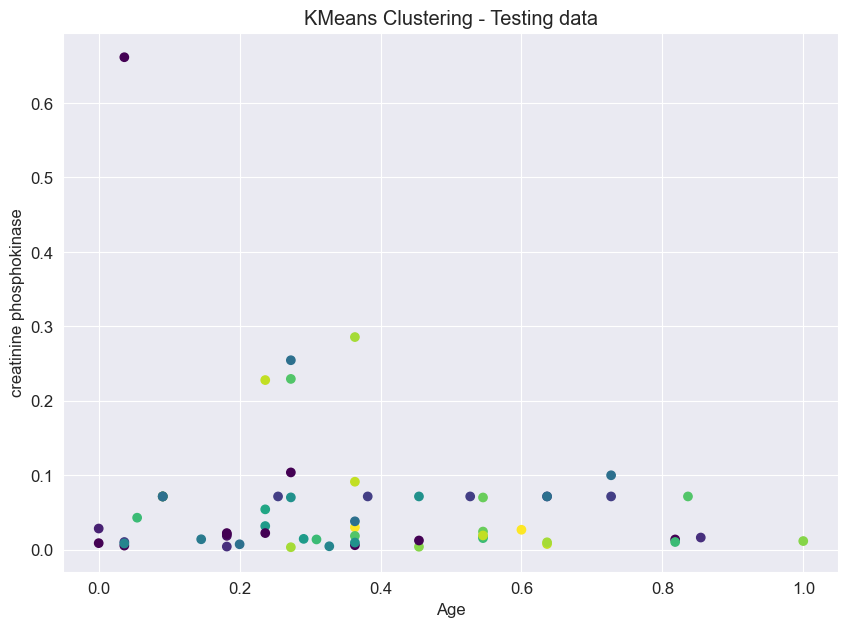

In [92]:
# Testing data
plt.scatter(test_x.iloc[:, 0], test_x.iloc[:, 2], c=kmeans_test_clusters, cmap='viridis')
plt.title('KMeans Clustering - Testing data')
plt.xlabel('Age')
plt.ylabel('creatinine phosphokinase')
plt.show()

- The Silhouette Scores are better than the initial scores, but they may not be considered high in general.  It is possible that a different clustering algorithm could perform better on this dataset.

[[8 1 2 1 4 3 0 2 4 2 1 2 1 1 1 2 3 1 2]
 [2 0 0 2 1 4 1 0 0 0 0 2 3 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


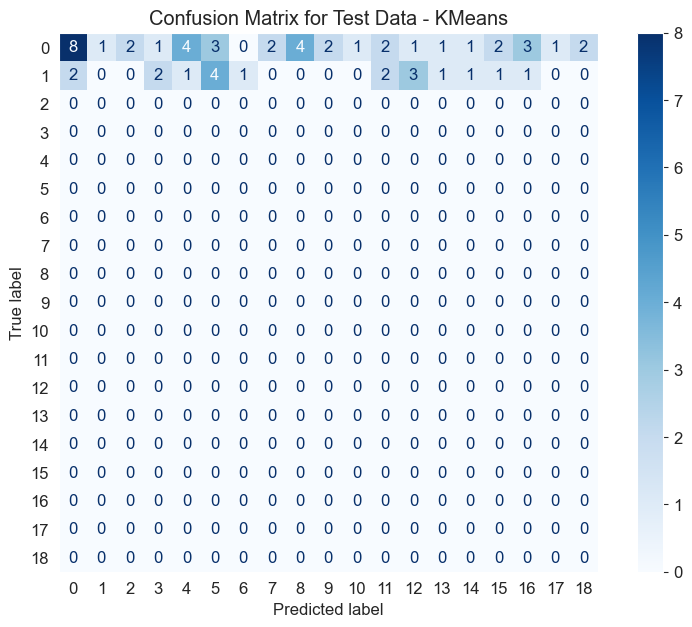

In [13]:
kmeans_cm = confusion_matrix(test_y, kmeans_test_clusters)
print(kmeans_cm)

# plot confusion matrix
kmeans_cm_plot = ConfusionMatrixDisplay(confusion_matrix=kmeans_cm)
kmeans_cm_plot.plot(cmap='Blues')
plt.title('Confusion Matrix for Test Data - KMeans')
plt.grid(b=None)
plt.show()

### ___DBSCAN___

In [14]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(train_x)

dbscan_train_labels = dbscan.labels_
dbscan_test_labels = dbscan.fit_predict(test_x)

dbscan_train_silhouette = silhouette_score(train_x, dbscan_train_labels)
dbscan_test_silhouette = silhouette_score(test_x, dbscan_test_labels)

print(f"DBSCAN Silhouette Score - Training data: {dbscan_train_silhouette}")
print(f"DBSCAN Silhouette Score - Testing data: {dbscan_test_silhouette}")

DBSCAN Silhouette Score - Training data: 0.2684685769367173
DBSCAN Silhouette Score - Testing data: 0.06133432332592777


- The score is so low. There should be a better set of `eps` and `min_samples` values

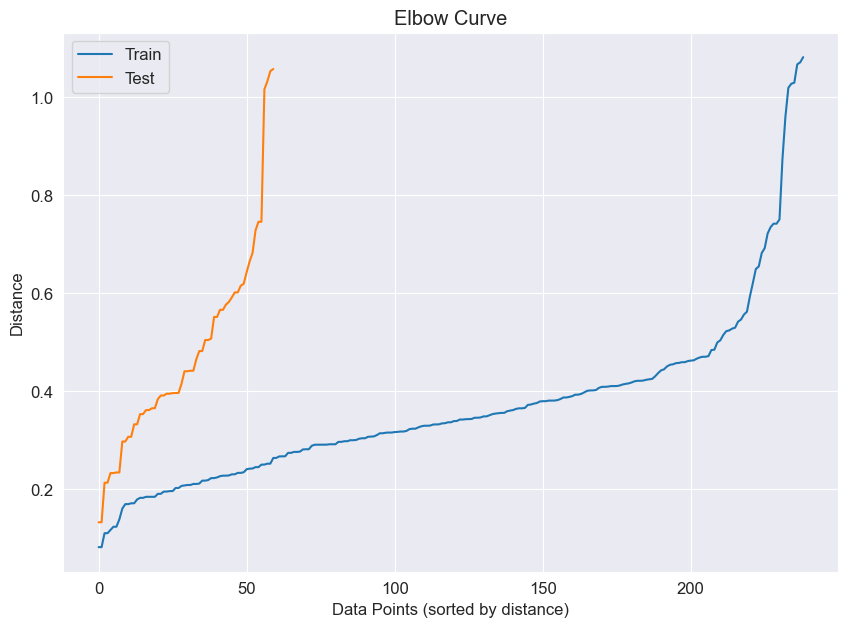

Optimal eps for train_x: 0.7413199040234493
Optimal eps for test_x: 1.0568574621645763


In [15]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# fit nearest neighbors model on train_x
nn = NearestNeighbors(n_neighbors=2)
nn.fit(train_x)
distances_train, indices_train = nn.kneighbors(train_x)

# sort the distances and plot elbow curve for train_x
distances_train = np.sort(distances_train, axis=0)
distances_train = distances_train[:,1]

sns.lineplot(x=range(len(distances_train)), y=distances_train, label='Train')

# fit nearest neighbors model on test_x
distances_test = []
nn.fit(test_x)
distances_test, indices_test = nn.kneighbors(test_x)

# sort the distances and plot elbow curve for test_x
distances_test = np.sort(distances_test, axis=0)
distances_test = distances_test[:,1]

sns.lineplot(x=range(len(distances_test)), y=distances_test, label='Test')

plt.xlabel('Data Points (sorted by distance)')
plt.ylabel('Distance')
plt.title('Elbow Curve')
plt.legend()
plt.show()

# find optimal eps using knee point detection for train_x
kl_train = KneeLocator(range(len(distances_train)), distances_train, curve='convex', direction='increasing')
optimal_eps_train = distances_train[kl_train.knee]
print(f"Optimal eps for train_x: {optimal_eps_train}")

# find optimal eps using knee point detection for test_x
kl_test = KneeLocator(range(len(distances_test)), distances_test, curve='convex', direction='increasing')
optimal_eps_test = distances_test[kl_test.knee]
print(f"Optimal eps for test_x: {optimal_eps_test}")

# optimal_min_samples_train = kl_train.elbow
# print(f"Optimal min_samples: {optimal_min_samples_train}")
# optimal_min_samples_test = kl_test.elbow
# print(f"Optimal min_samples: {optimal_min_samples_test}")

- Now we will try to find the optimal min_samples for the train set

In [16]:
eps_value_train = 0.7413199040234493
min_samples_values = np.arange(3,23,1)

best_min_samples_train = None
best_score_train = -1

# for eps in eps_values:
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps_value_train, min_samples=min_samples)
    # dbscan.fit(train_x)
    score = silhouette_score(train_x, dbscan.fit_predict(train_x))
    
    if score > best_score_train:
        best_min_samples_train = min_samples
        best_score_train = score

print(f'Best min_samples={best_min_samples_train}, silhouette score={best_score_train}')

Best min_samples=3, silhouette score=0.44894416524612796


In [17]:
dbscan = DBSCAN(eps=0.7413199040234493, min_samples=3)
# dbscan.fit(train_x)

dbscan_train_labels = dbscan.fit_predict(train_x)
# dbscan_test_labels = dbscan.fit_predict(test_x)

dbscan_train_silhouette = silhouette_score(train_x, dbscan_train_labels)
# dbscan_test_silhouette = silhouette_score(test_x, dbscan_test_labels)

print(f"DBSCAN Silhouette Score - Training data: {dbscan_train_silhouette}")
# print(f"DBSCAN Silhouette Score - Testing data: {dbscan_test_silhouette}")

DBSCAN Silhouette Score - Training data: 0.44894416524612796


- Now we will try to find the optimal min_samples for the test set

In [18]:
eps_value_test = 1.0568574621645763
min_samples_values = np.arange(3,13,1)

best_min_samples_test = None
best_score_test = -1

# for eps in eps_values:
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps_value_test, min_samples=min_samples)
    # dbscan.fit(test_x)
    score = silhouette_score(test_x, dbscan.fit_predict(test_x))
    
    if score > best_score_test:
        best_min_samples_test = min_samples
        best_score_test = score

print(f'Best min_samples={best_min_samples_test}, silhouette score={best_score_test}')

Best min_samples=5, silhouette score=0.1619940923038218


In [19]:
dbscan = DBSCAN(eps=1.0568574621645763, min_samples=5)
# dbscan.fit(train_x)

# dbscan_train_labels = dbscan.labels_
dbscan_test_labels = dbscan.fit_predict(test_x)

# dbscan_train_silhouette = silhouette_score(train_x, dbscan_train_labels)
dbscan_test_silhouette = silhouette_score(test_x, dbscan_test_labels)

# print(f"DBSCAN Silhouette Score - Training data: {dbscan_train_silhouette}")
print(f"DBSCAN Silhouette Score - Testing data: {dbscan_test_silhouette}")

DBSCAN Silhouette Score - Testing data: 0.1619940923038218


- The DBSCAN cluster is still not performing well. We can try to do feature selection, as we already knew there are a few features which are most important.

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(train_x, train_y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

selected_features = X.columns[indices[:5]]
print(selected_features)

Index(['time', 'serum_creatinine', 'ejection_fraction', 'platelets', 'age'], dtype='object')


In [21]:
from sklearn.decomposition import PCA

# Initialize the PCA transformer
pca = PCA(n_components=5)

# Fit the transformer to the training data
pca.fit(train_x[selected_features])

# Transform the training and test data using the fitted transformer
train_x_pca = pca.transform(train_x[selected_features])
test_x_pca = pca.transform(test_x[selected_features])

- After tried with different combinations of `eps` and `min_samples`, I got the following results

In [22]:
dbscan = DBSCAN(eps=0.385, min_samples=16)
# dbscan.fit(train_x_pca)

dbscan_train_labels = dbscan.fit_predict(train_x_pca)
dbscan_test_labels = dbscan.fit_predict(test_x_pca)

dbscan_train_silhouette = silhouette_score(train_x_pca, dbscan_train_labels)
dbscan_test_silhouette = silhouette_score(test_x_pca, dbscan_test_labels)

print(f"DBSCAN Silhouette Score - Training data: {dbscan_train_silhouette}")
print(f"DBSCAN Silhouette Score - Testing data: {dbscan_test_silhouette}")

DBSCAN Silhouette Score - Training data: 0.44440721358894714
DBSCAN Silhouette Score - Testing data: 0.28325348396318506


- Visualize the DBSCAN clusters

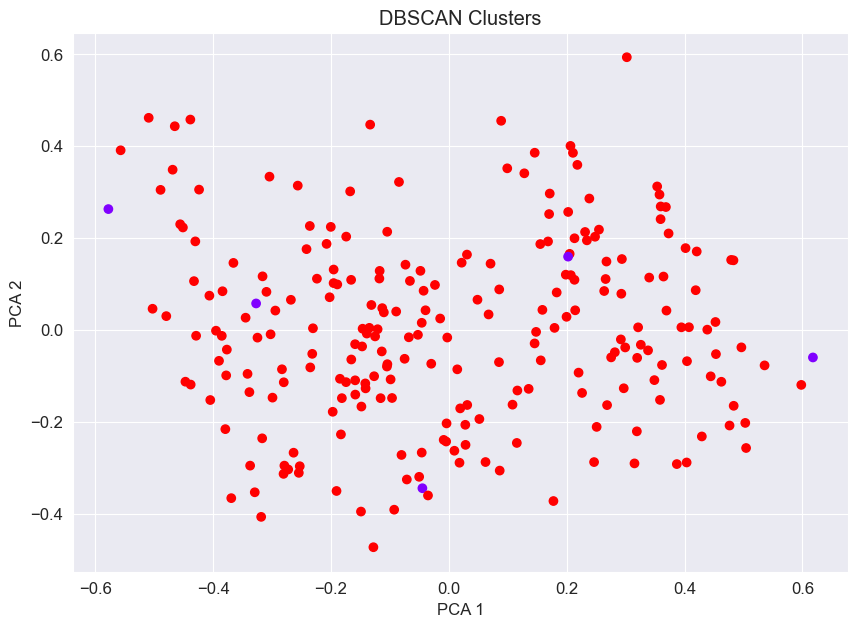

In [49]:
plt.scatter(train_x_pca[:, 0], train_x_pca[:, 1], c=dbscan_train_labels, cmap='rainbow')
plt.title('DBSCAN Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

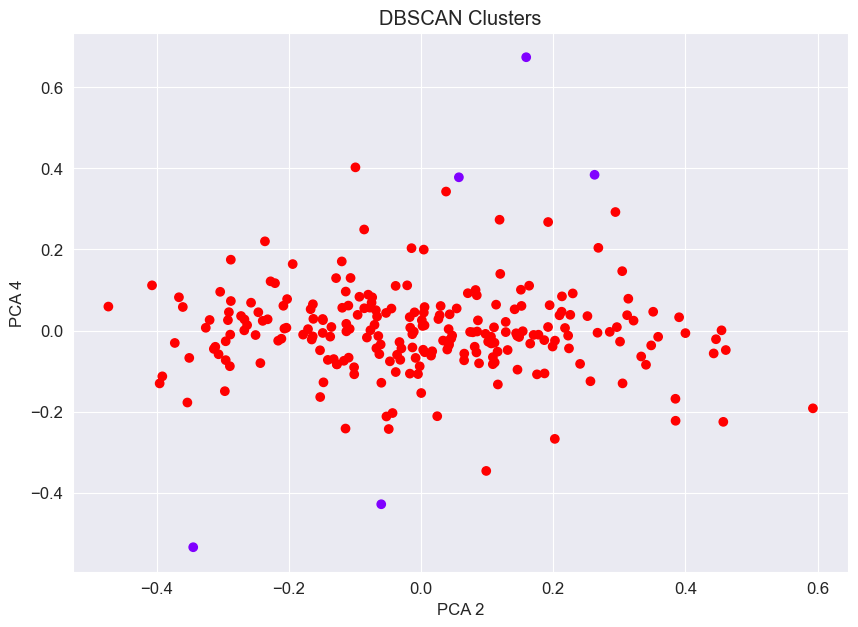

In [53]:
plt.scatter(train_x_pca[:, 1], train_x_pca[:, 3], c=dbscan_train_labels, cmap='rainbow')
plt.title('DBSCAN Clusters')
plt.xlabel('PCA 2')
plt.ylabel('PCA 4')
plt.show()

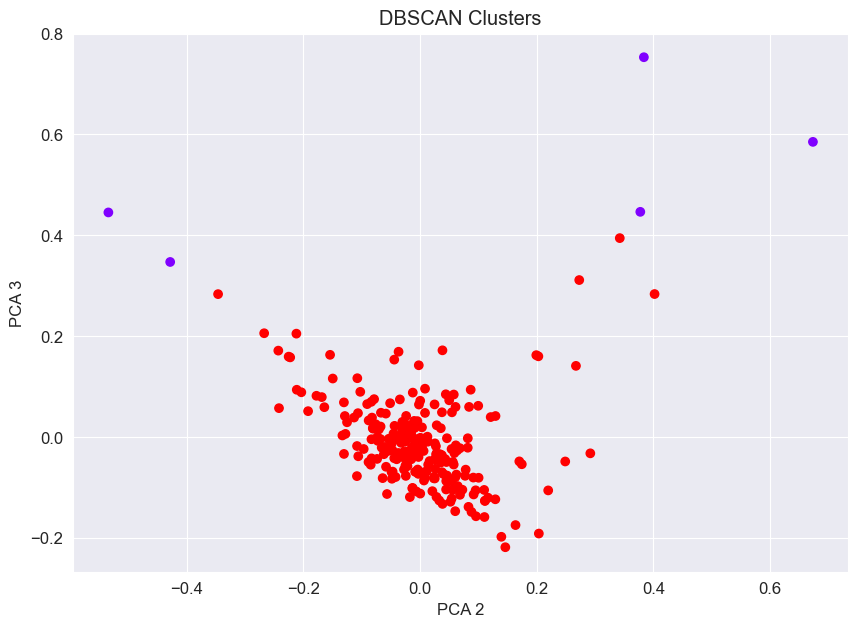

In [48]:
plt.scatter(train_x_pca[:, 3], train_x_pca[:, 4], c=dbscan_train_labels, cmap='rainbow')
plt.title('DBSCAN Clusters')
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')
plt.show()

- It improves but not significantly.

[[ 0  0  0]
 [ 1 40  0]
 [ 7 12  0]]


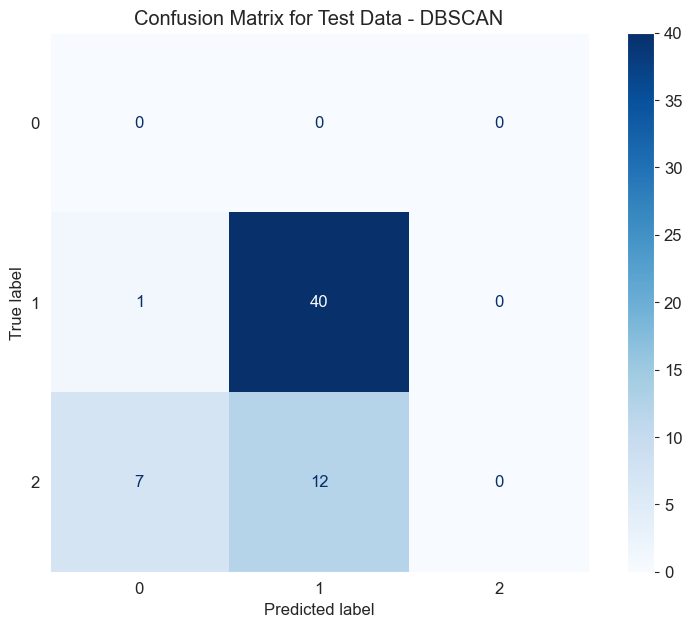

In [28]:
dbscan_cm = confusion_matrix(test_y, dbscan_test_labels)
print(dbscan_cm)

# plot confusion matrix
dbscan_cm_plot = ConfusionMatrixDisplay(confusion_matrix=dbscan_cm)
dbscan_cm_plot.plot(cmap='Blues')
plt.title('Confusion Matrix for Test Data - DBSCAN')
plt.grid(b=None)
plt.show()

### ___Hierarchical___

In [29]:
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='average')
# hierarchical.fit(train_x)
hierarchical_train_labels = hierarchical.fit_predict(train_x)
hierarchical_test_labels = hierarchical.fit_predict(test_x)

hierarchical_silhouette_train = silhouette_score(train_x, hierarchical_train_labels)
hierarchical_silhouette_test = silhouette_score(test_x, hierarchical_test_labels)

print("Hierarchical Silhouette Score - Training data:", hierarchical_silhouette_train)
print("Hierarchical Silhouette Score - Testing data:", hierarchical_silhouette_test)

Hierarchical Silhouette Score - Training data: 0.18081796388466212
Hierarchical Silhouette Score - Testing data: 0.21067250461332046


- The scores are really low, we may need to find some ways to optimize the clustering performance.

In [30]:
# Try different values of n_clusters
n_clusters = np.arange(2,30,1)

# Try different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

best_score = -1
best_n = -1
best_linkage = ''

# Iterate over all combinations of n_clusters and linkage methods
for n in n_clusters:
    for linkage in linkage_methods:
        hierarchical = AgglomerativeClustering(n_clusters=n, linkage=linkage)
        hierarchical_train_labels = hierarchical.fit_predict(train_x)
        hierarchical_test_labels = hierarchical.fit_predict(test_x)

        hierarchical_silhouette_train = silhouette_score(train_x, hierarchical_train_labels)
        hierarchical_silhouette_test = silhouette_score(test_x, hierarchical_test_labels)

        # print(f"n_clusters = {n}, linkage = {linkage}")
        # print("Hierarchical Silhouette Score - Training data:", hierarchical_silhouette_train)
        # print("Hierarchical Silhouette Score - Testing data:", hierarchical_silhouette_test)
        # print()

        # Check if this combination of n_clusters and linkage method is the best so far
        if hierarchical_silhouette_test > best_score:
            best_score = hierarchical_silhouette_test
            best_n = n
            best_linkage = linkage

# Print out the best combination of n_clusters and linkage method
print(f"Best combination: n_clusters = {best_n}, linkage = {best_linkage}, silhouette score = {best_score}")

Best combination: n_clusters = 17, linkage = complete, silhouette score = 0.44489043585788407


In [31]:
hierarchical = AgglomerativeClustering(n_clusters=17, linkage='complete')
# hierarchical.fit(train_x)
hierarchical_train_labels = hierarchical.fit_predict(train_x)
hierarchical_test_labels = hierarchical.fit_predict(test_x)

hierarchical_silhouette_train = silhouette_score(train_x, hierarchical_train_labels)
hierarchical_silhouette_test = silhouette_score(test_x, hierarchical_test_labels)

print("Hierarchical Silhouette Score - Training data:", hierarchical_silhouette_train)
print("Hierarchical Silhouette Score - Testing data:", hierarchical_silhouette_test)

Hierarchical Silhouette Score - Training data: 0.33242823785794395
Hierarchical Silhouette Score - Testing data: 0.44489043585788407


- We can see the scores are better now.

- Visualization

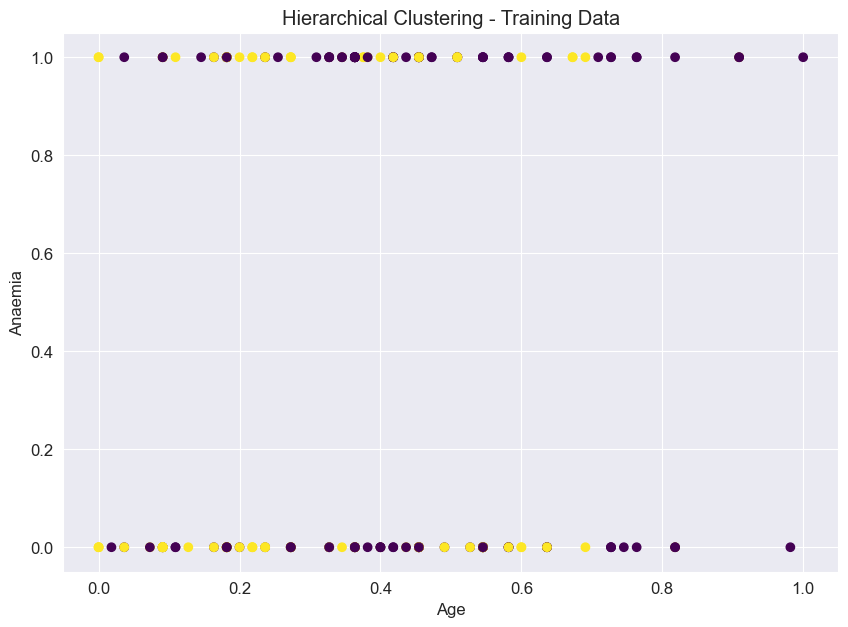

In [88]:
# Plot the clusters for the training data
plt.scatter(train_x.iloc[:, 0], train_x.iloc[:, 1], c=hierarchical_train_labels, cmap='viridis')
plt.title('Hierarchical Clustering - Training Data')
plt.xlabel('Age')
plt.ylabel('Anaemia')
plt.show()

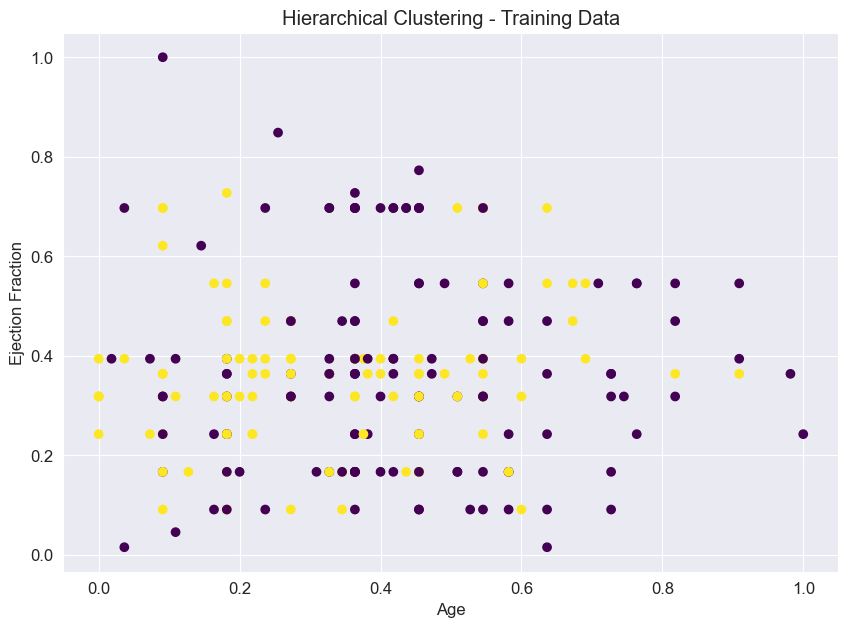

In [86]:
# Plot the clusters for the training data
plt.scatter(train_x.iloc[:, 0], train_x.iloc[:, 4], c=hierarchical_train_labels, cmap='viridis')
plt.title('Hierarchical Clustering - Training Data')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.show()

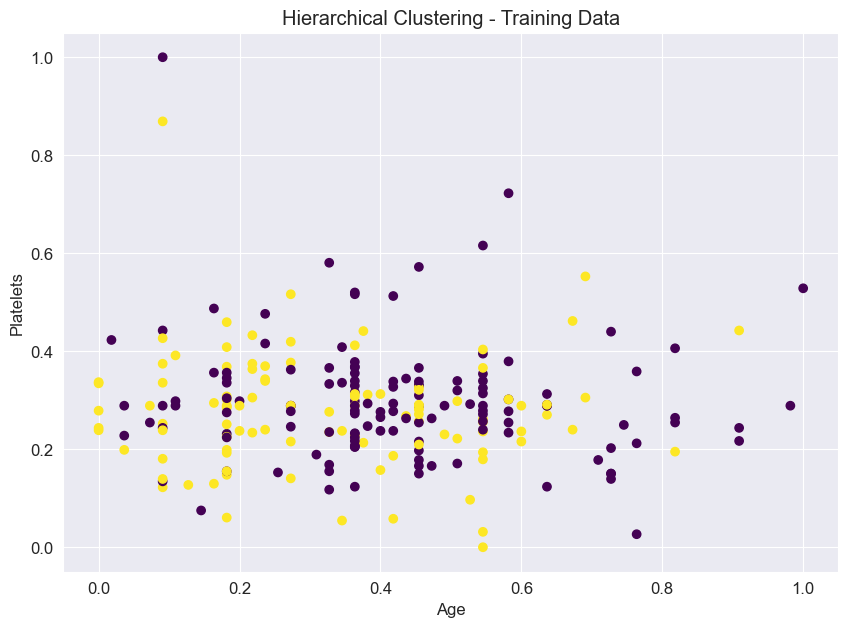

In [83]:
# Plot the clusters for the training data
plt.scatter(train_x.iloc[:, 0], train_x.iloc[:, 6], c=hierarchical_train_labels, cmap='viridis')
plt.title('Hierarchical Clustering - Training Data')
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.show()

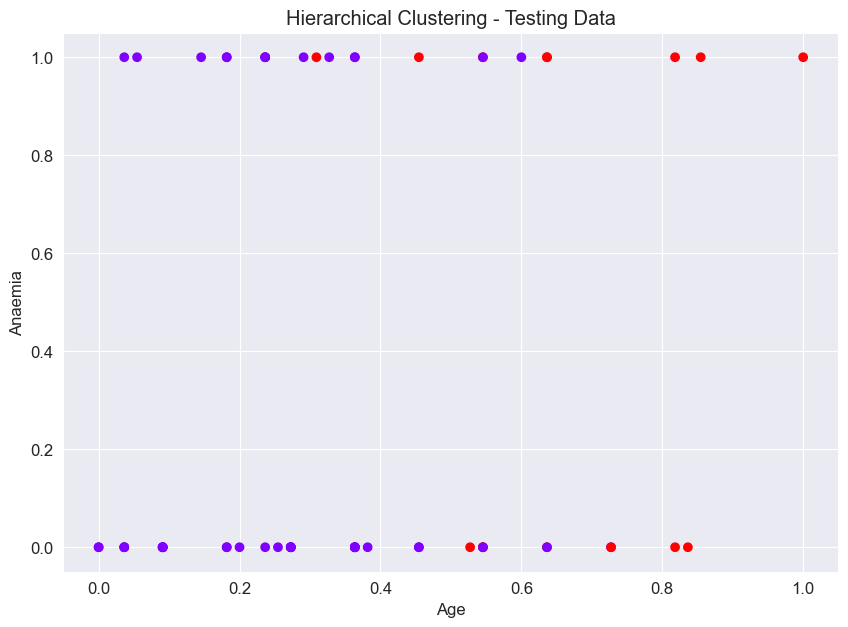

In [89]:
# Plot the clusters for the testing data
plt.scatter(test_x.iloc[:, 0], test_x.iloc[:, 1], c=hierarchical_test_labels, cmap='rainbow')
plt.title('Hierarchical Clustering - Testing Data')
plt.xlabel('Age')
plt.ylabel('Anaemia')
plt.show()

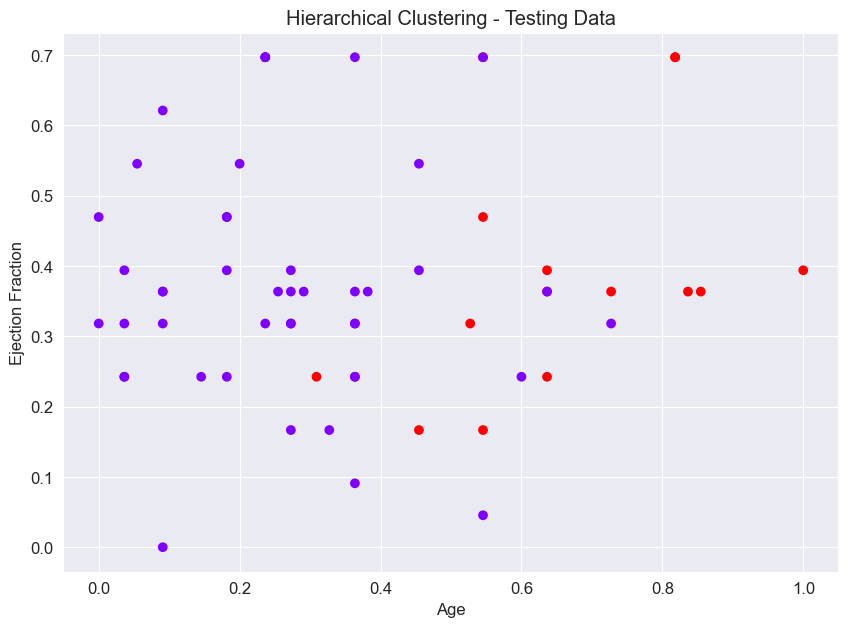

In [90]:
# Plot the clusters for the training data
plt.scatter(test_x.iloc[:, 0], test_x.iloc[:, 4], c=hierarchical_test_labels, cmap='rainbow')
plt.title('Hierarchical Clustering - Testing Data')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.show()

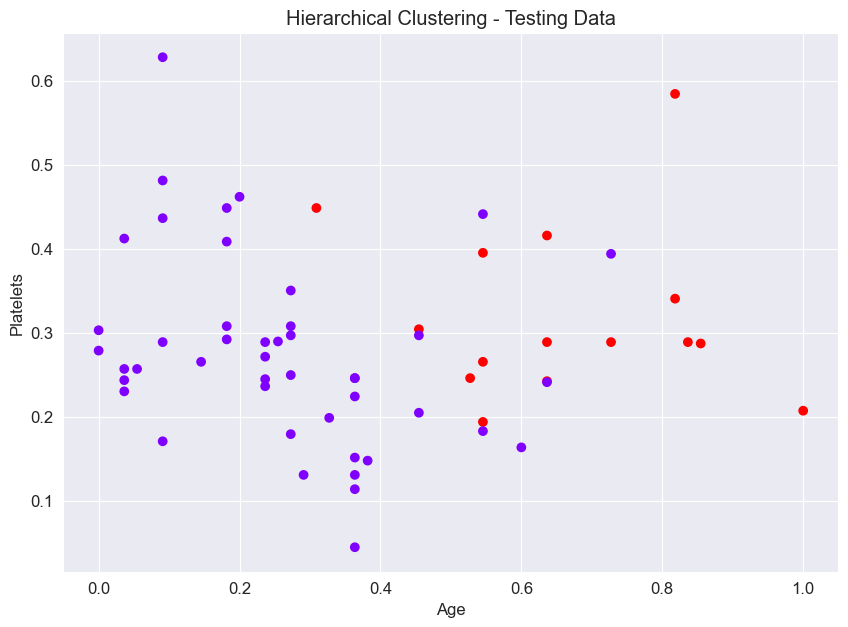

In [91]:
# Plot the clusters for the training data
plt.scatter(test_x.iloc[:, 0], test_x.iloc[:, 6], c=hierarchical_test_labels, cmap='rainbow')
plt.title('Hierarchical Clustering - Testing Data')
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.show()

- The clusters are not too good.

- Let's try with PCA

In [32]:
# Try different values of n_clusters
n_clusters = np.arange(2,30,1)

# Try different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

best_score = -1
best_n = -1
best_linkage = ''

# Iterate over all combinations of n_clusters and linkage methods
for n in n_clusters:
    for linkage in linkage_methods:
        hierarchical = AgglomerativeClustering(n_clusters=n, linkage=linkage)
        hierarchical_train_labels = hierarchical.fit_predict(train_x_pca)
        hierarchical_test_labels = hierarchical.fit_predict(test_x_pca)

        hierarchical_silhouette_train = silhouette_score(train_x_pca, hierarchical_train_labels)
        hierarchical_silhouette_test = silhouette_score(test_x_pca, hierarchical_test_labels)

        # print(f"n_clusters = {n}, linkage = {linkage}")
        # print("Hierarchical Silhouette Score - Training data:", hierarchical_silhouette_train)
        # print("Hierarchical Silhouette Score - Testing data:", hierarchical_silhouette_test)
        # print()

        # Check if this combination of n_clusters and linkage method is the best so far
        if hierarchical_silhouette_test > best_score:
            best_score = hierarchical_silhouette_test
            best_n = n
            best_linkage = linkage

# Print out the best combination of n_clusters and linkage method
print(f"Best combination: n_clusters = {best_n}, linkage = {best_linkage}, silhouette score = {best_score}")

Best combination: n_clusters = 2, linkage = complete, silhouette score = 0.29461184600561946


In [33]:
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='complete')
# hierarchical.fit(train_x)
hierarchical_train_labels = hierarchical.fit_predict(train_x_pca)
hierarchical_test_labels = hierarchical.fit_predict(test_x_pca)

hierarchical_silhouette_train = silhouette_score(train_x_pca, hierarchical_train_labels)
hierarchical_silhouette_test = silhouette_score(test_x_pca, hierarchical_test_labels)

print("Hierarchical Silhouette Score - Training data:", hierarchical_silhouette_train)
print("Hierarchical Silhouette Score - Testing data:", hierarchical_silhouette_test)

Hierarchical Silhouette Score - Training data: 0.2801972111761411
Hierarchical Silhouette Score - Testing data: 0.29461184600561946


- We can see that PCA may not be needed here as the scores are lower.

[[38  3]
 [ 7 12]]


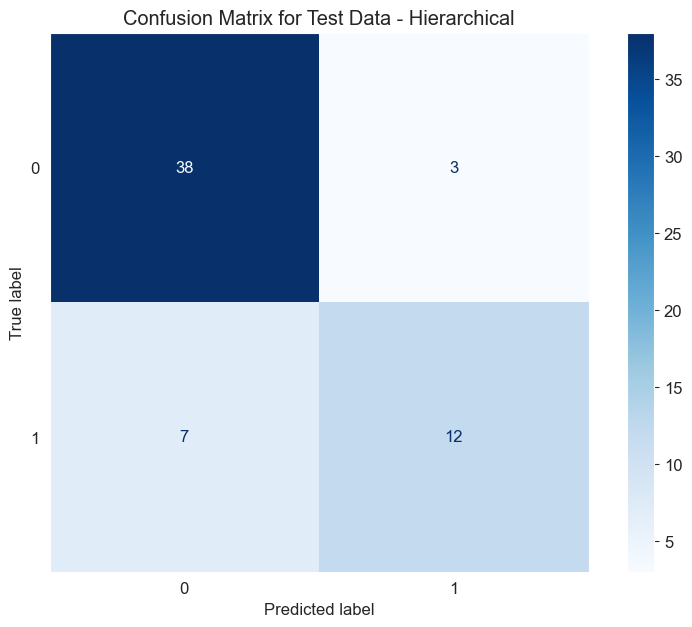

In [34]:
hierarchical_cm = confusion_matrix(test_y, hierarchical_test_labels)
print(hierarchical_cm)

# plot confusion matrix
hierarchical_cm_plot = ConfusionMatrixDisplay(confusion_matrix=hierarchical_cm)
hierarchical_cm_plot.plot(cmap='Blues')
plt.title('Confusion Matrix for Test Data - Hierarchical')
plt.grid(b=None)
plt.show()

## __Report__

```html
    In this project, we explored three different clustering methods - KMeans, DBSCAN, and Hierarchical - to cluster heart disease patient data. Our goal was to group the patients based on their health conditions and identify any patterns in the data that could potentially help with predicting patient outcomes.

    Initially, all three methods returned pretty low silhouette scores, suggesting that they could be potentially optimized. For the KMeans clustering, we started with selecting the optimal number of clusters using the elbow method and silhouette scores. Even though these methods can be computationally expensive, they can provide a quantitative measure of the quality of clustering based on different number of clusters. After experimenting with different number of clusters, we found that 23 clusters were optimal for our data. It returned a Silhouette score of around 0.45 for the training data, and 0.44 for the testing data. These scores suggest that the data may not have distinct clusters, and there may be some overlap between groups.

    Moving forward, we also used the elbow method and silhouette score to optimize the hyperparameters of DBSCAN. However, after trying with several combinations of eps and min_samples, we still got really low silhouette scores. As we knew a list of most important features ('time', 'serum_creatinine', 'ejection_fraction', 'platelets', 'age') thanks to Logistic Regression and Random Forests, we applied PCA to reduce the dimensionality of the dataset before clustering. Since PCA can remove the effect of redundant and unimportant features, it can reduce the computation cost and make the clustering algorithms work faster. However, after tried with different set of parameters, the most efficient combination of eps = 0.385 and min_samples = 16 still returned below average silhouette scores, which were 0.44 for the training data, and 0.28 for the testing data. It may indicate that the data is not well-suited for clustering using this method. The data may not contain dense clusters, separated by sparse regions.

    Lastly, we used with Hierarchical Clustering, which is a clustering method that builds a hierarchy of clusters. We tried different linkage methods and numbers of clusters to find the optimal combinations because these hyperparameters can significantly affect the quality of the clustering results. We ended up with n_clusters of 17 and "complete" linkage, resulting in a testing silhouette score of approximately 0.44.

    Overall, KMeans and Hierarchical gave us the best results among all three clustering methods. However, the scores were not enough to say that these clusters were performing well. It might indicate that we should not use clustering algorithms with this dataset, instead we should use some other algorithms, such as Logistic Regression, Decision Tree, or Random Forests.
    
```